In [3]:
!pip install pybithumb

     |████████████████████████████████| 112 kB 5.4 MB/s 
     |████████████████████████████████| 51 kB 425 kB/s 
     |████████████████████████████████| 251 kB 46.0 MB/s 


In [4]:
import pybithumb
btc = pybithumb.get_candlestick("BTC")
xrp = pybithumb.get_candlestick("XRP")

In [5]:
btc["close"].keys

<bound method Series.keys of time
2013-12-27 00:00:00      755000.0
2013-12-28 00:00:00      750000.0
2013-12-29 00:00:00      739000.0
2013-12-30 00:00:00      768000.0
2013-12-31 00:00:00      768000.0
                          ...    
2022-04-15 00:00:00    50379000.0
2022-04-16 00:00:00    50605000.0
2022-04-17 00:00:00    50321000.0
2022-04-18 00:00:00    49418000.0
2022-04-19 20:00:00    50901000.0
Name: close, Length: 2946, dtype: float64>

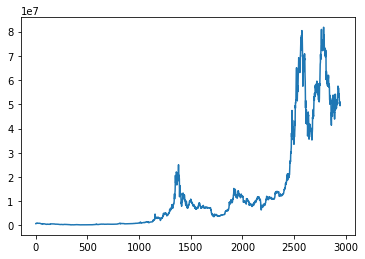

In [6]:
import matplotlib.pyplot as plt
import numpy as np
x= np.arange(len(btc['close'].values))

plt.plot(x,btc["close"].values)

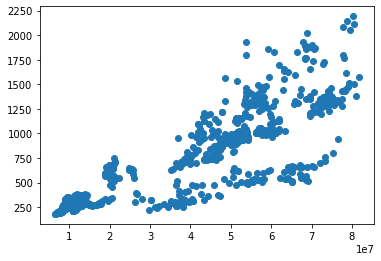

In [7]:
plt.scatter(btc["close"][-1000:],xrp["close"][-1000:])

In [8]:
btc_re = btc['close'].values[-1000:].reshape(-1 ,1)

In [9]:
o = np.ones( (1000,1), dtype=np.uint32)

In [10]:
btc_o= np.hstack( (btc_re,o))
btc_o.shape

(1000, 2)

In [11]:
xrp_re = xrp['close'].values[-1000:].reshape( -1,1)
xrp_re.shape

(1000, 1)

In [12]:
btc_o_t = np.linalg.pinv(btc_o)


In [15]:
result = btc_o_t @ xrp_re
a = result[0,0]
b = result[1,0]
print(a,b)

1.698589573549738e-05 85.41801613946689


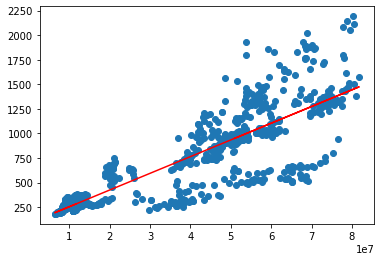

In [14]:
plt.scatter(btc["close"][-1000:],xrp["close"][-1000:])

x = btc['close'].values[-1000:]
y = a*x +b  # 회귀

plt.plot(x,y,color="r")

## 판다스 (Pandas) 라이브러리

Pandas는 데이터 분석을 위한 고수준의 자료구조와 데이터 분석 도구를 제공합니다.  
- 여기서 고수준이란 사용자가 쉽게 데이터를 제어하고 시각화 할 수 있는 메서드를 의미합니다.

판다스는 데이터 분석분야 에서 필수적으로 사용되는 중요한 모듈입니다. 

<img src="https://i.ibb.co/Hh85f7j/series-0.png" width="600" height="400" style="float:left" />

그림출처  
https://plot.ly/pandas/2D-Histogram/  
https://plot.ly/pandas/histograms/

판다스에는 <b>시리즈(Series)</b>와 <b>데이터 프레임 (DataFrame)</b> 두 개의 자료구조를 사용합니다. 
- 1차원 데이터를 관리하는 `Series`
- 2차원 데이터를 관리하는 `DataFrame`

파이썬의 기본자료구조(리스트, 튜플, 딕셔너리)의 부족한 부분을 보완해 보다 고수준으로 만든 자료구조로 numpy의 `ndarray`가 있었습니다.  
ndarray는 수치 연산에 특화돼 있으며, 브로드캐스팅 기능으로 반복문을 사용하지 않고 `ndarray`의 모든 데이터에 연산 적용이 가능했었습니다.  판다스의 자료구조는 `ndarray`를 기반으로 행과 열에 이름을 붙여 가독성을 높이고 보다 범용적인 목적의 데이터를 관리해줍니다.

다양한 방식으로 import 할 수 있는데, 다음 세 가지 형태를 빈번하게 사용합니다. 

In [ ]:
import pandas as pd
from pandas import Series
from pandas import DataFrame

### 시리즈 객체

리스트를 사용해서 시리즈 객체로 업그레이드 할 수 있습니다.  
정확히 이야기하면 시리즈 클래스는 생성자로 하나의 리스트를 입력받는 겁니다.  

In [ ]:
from pandas import Series


data = np.array(["가", "나", "다"])
s = Series(data)
print(s)

0    가
1    나
2    다
dtype: object


시리즈 객체는 자동으로 0 부터 시작하는  인덱스가 부여되며, 시리즈 객체를 출력해 보면 인덱스와 맵핑된 값이 한 로우에 표시됩니다. 또한 내부적으로 0부터 시작하는 행번호를 아래 그림과 같이 부여합니다. (행 번호의 쓰임새는 뒤에서 설명하겠습니다.) 즉, 시리즈는 입력된 데이터에 대해 행번호와 인덱스를 부여하고 출력하면 인덱스와 데이터만 표시되는 겁니다. 

<img src="https://i.ibb.co/Xy8Ph47/series-1.png" width="500" style="float:left" />

시리즈 객체를 생성할 때 인덱스 값을 추가할 수 있습니다.  
- index 파라미터에 리스트 형태로 각 값에 대응되는 인덱스를 입력합니다.   
- 반드시 입력된 데이터의 개수와 인덱스의 개수가 동일해야 합니다. 


In [ ]:
data = [1000, 2000, 3000]
index = ['메로나', '구구콘', '하겐다즈']
s = Series(data=data, index=index)
print(s)


메로나     1000
구구콘     2000
하겐다즈    3000
dtype: int64
1000


시리즈는 0부터 시작하는 행 번호를 부여하고, 인덱스는 사용자가 입력한 문자열을 사용합니다. 

<img src="https://i.ibb.co/FHfknW8/series-2.png" width="500" style="float:left" />

시리즈 객체에는 다양한 속성 (인스턴스 변수)가 있습니다. 

In [ ]:
print(s.index)
print(s.values)
print(s.dtype)

Index(['메로나', '구구콘', '하겐다즈'], dtype='object')
[1000 2000 3000]
int64


`values`에는 시리즈의 데이터가 `ndarray`로 저장돼 있습니다. 

Q. 시가와 고가를 시리즈로 구성하라. 

<img src="https://i.ibb.co/DQzv2sc/series-4.png" width="800" style="float:left" />

In [ ]:
시가 = Series(data=[100,200], index=["2019.01","2019.02"])
시가 

2019.01    100
2019.02    200
dtype: int64

### 시리즈의 인덱싱과 슬라이싱
시리즈의 인덱싱 방법은 세 가지 방법을 사용할 수 있습니다. 
- `iloc`
- `loc`
- `[ ]`

iloc는 "행 번호"를 사용해서 하나의 데이터를 선택합니다. 

In [ ]:
data = [1000, 2000, 3000]
index = ['메로나', '구구콘', '하겐다즈']
s = Series(data, index=index)

print(s.loc['메로나']) # 만든 인덱스
print(s.iloc[  0   ])  # 디폴트 인덱스
# 인덱싱


1000


1000

loc는 "인덱스"를 사용해서 하나의 데이터를 선택합니다.

iloc와 loc를 사용하지 않고 대괄호 `[ ]`를 바로 사용해도, 똑똑한 시리즈 객체는 적절한 값을 반환합니다.

리스트의 정수 인덱싱과 딕셔너리의 킷값을 사용한 인덱싱을 섞어 논것과 유사합니다. 

----
하나 이상의 데이터를 가져오는 슬라이싱도 사용할 수 있습니다. 이 때에도 `iloc`와 `loc` 기능을 사용합니다. 

In [ ]:
# iloc
s.iloc[0 :2]

메로나    1000
구구콘    2000
dtype: int64

In [ ]:
# loc
s.loc["메로나":"하겐다즈"]  #직접만든 인덱싱은 end point도 포함

메로나     1000
구구콘     2000
하겐다즈    3000
dtype: int64

시리즈는 인접하지 않은 불연속적인 데이터를 슬라이싱할 수있습니다. 

In [ ]:
s.loc [["메로나",'구구콘']]

메로나    1000
구구콘    2000
dtype: int64

이러한 코드는 간단하기 때문에 한 줄에 짧게 표현할 수도 있습니다. 

### 시리즈의 수정
딕셔너리의 값을 추가(수정)했던 것과 같이 시리즈도 `iloc` 혹은 `loc`로 데이터에 접근해서 값을 대입하면 됩니다. 다음과 같이 기존에 값이 존재하지 않는다면 데이터가 추가됩니다. 

In [ ]:
data = [1000, 2000, 3000]
index = ['메로나', '구구콘', '하겐다즈']
s = Series(data, index=index)
print(s)
s.loc['비비빅'] = 500
print(s)

메로나     1000
구구콘     2000
하겐다즈    3000
dtype: int64
메로나     1000
구구콘     2000
하겐다즈    3000
비비빅      500
dtype: int64


데이터가 존재한다면 값을 업데이트 합니다. 

In [ ]:
s.loc['비비빅'] = 400
print(s)

메로나     1000
구구콘     2000
하겐다즈    3000
비비빅      400
dtype: int64


데이터의 삭제는 `drop` 메서드를 사용합니다. `drop` 메서드는 삭제된 결과를 반환하며, 원본 데이터는 수정하지 않습니다. 이는 실수로 데이터를 삭제할 수 있는 위험을 줄이기 위함입니다. 

In [ ]:
s.drop("비비빅",inplace=True)

print(s)


메로나     1000
구구콘     2000
하겐다즈    3000
dtype: int64


시리즈의 슬라이싱을 응용해서 데이터를 제거할 수도 있습니다. 

In [ ]:
s = s.iloc[:-1]
print(s)

메로나     1000
구구콘     2000
하겐다즈    3000
dtype: int64


### 시리즈의 연산
판다스는 `ndarra`를 기반으로 만들어졌기 때문에 `브로드캐스팅`을 모두 지원합니다. 
연산이 모든 데이터에 적용되는 겁니다. 

In [ ]:
from pandas import Series

s1 = Series([10, 20, 30])


시리즈는 `ndarray`와 같이 같은 객체간의 연산을 지원합니다.  

In [ ]:
s2 = Series([20, 30, 40])



시리즈 객체 간의 연산을 할 때는 인덱스가 같아야 합니다. 

In [ ]:
s1 = Series([10, 20, 30], index = ["가", "나", "다"])
s2 = Series([20, 30, 40])

s1+s2  # NaN이 나온 이유: index가 맞지 않아서.

가   NaN
나   NaN
다   NaN
0   NaN
1   NaN
2   NaN
dtype: float64

In [ ]:
s1 = Series([10, 20, 30], index = ["가", "나", "다"])
s2 = Series([10, 20, 30], index = ["다", "나", "가"])

 
print(s1+s2)  # 순서가 달라도 인덱스를 찾아서 연산한다. 하지만 다른 인덱스가 추가되면 짝을 찾을 수 없으므로 NaN이 출력된다.

가    40
나    40
다    40
dtype: int64


In [ ]:
print(type(np.nan))  # numpy의 nan은 float타입이다.

print(np.nan +4)

<class 'float'>
nan


Pandas는 결측치를 표현하기 위해 np.nan 값을 사용합니다.   
NaN이란 비어있는 (존재하지 않는) 값입니다.

### 시리즈의 비교연산
모든 데이터에 비교 연산이 적용되고 boolean형 데이터가 저장된 하나의 시리즈가 반환됩니다.

In [ ]:
s1 = Series([10, 20, 30], index = ["가", "나", "다"])
print(s1 > 20)

가    False
나    False
다     True
dtype: bool


참/거짓이 저장된 조건 시리즈를 얻어 왔다면 값을 필터링 할 수 있겠죠?

In [ ]:
s1[s1>20]

다    30
dtype: int64

Q. LG전자의 종가 데이터가 시리즈로 저장돼 있다. LG전자의 주가가 85000원 보다 작을 때의 일자를 출력하라.

In [ ]:
lge = Series([93000, 82400, 99100, 81000, 72300], index = ["05/27", "05/28", "05/29", "05/30", "05/31"])

print(lge.index[ lge.values<85000])
print(lge[lge<85000].index)

Index(['05/28', '05/30', '05/31'], dtype='object')
Index(['05/28', '05/30', '05/31'], dtype='object')


In [ ]:
lge.loc[lge<85000]

05/28    82400
05/30    81000
05/31    72300
dtype: int64

05/28    82400
05/30    81000
05/31    72300
dtype: int64

Q. LG전자의 종가가 85000원 이하로 떨어진 횟수는?

In [ ]:
len(lge.loc[lge<85000])


3